In [1]:
import json
import numpy as np
import os
from glob import glob
import copy
from pprint import pprint
from pathlib import Path, PosixPath
import cv2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

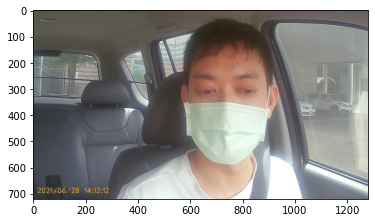

In [2]:
img = cv2.imread("../f_maps/output.jpg")
plt.imshow(img[..., ::-1])

In [2]:
b_lnmks = np.load("../f_maps/lnmks.npy")
b_offset_maps = np.load("../f_maps/offset_maps.npy")
b_resizes = np.load("../f_maps/resized.npy")
for i, (lnmks, resizes, offset_maps) in enumerate(zip(b_lnmks, b_resizes, b_offset_maps)):
    n, c, d = lnmks.shape
    lnmks = np.einsum('n c d, d -> n c d', lnmks, 1/resizes)
    lnmks = lnmks.astype(np.int32)
    keys = ["LE", "RE", "LM", "RM"]
    for i, lnmk in enumerate(lnmks):
        if i > 1:
            continue
        LE, RE = lnmk[0], lnmk[1] 
        N = lnmk[2] 
        LM, RM = lnmk[3], lnmk[4] 
        x_shifts = list(range(-3, 4, 1))
        y_shifts = list(range(-3, 4, 1))
        ss_vals = []
        ss_lnmks = []
        for i, key in zip(range(4), keys):
            offset_vector = offset_maps[...,  i*2:(i+1)*2]
            tmp_vals = []
            for x in x_shifts:
                for y in y_shifts:
                    ss_lnmks.append([N[0] + x, N[1] + y])
                    vec_y, vec_x = offset_vector[N[0] + y , N[1] + x]
                    tmp_vals.append([vec_y, vec_x])
                    
            ss_vals.append(tmp_vals)

sel_shift_lnmks = np.asarray(ss_lnmks[:49])
point_LE_vecs = np.asarray(ss_vals[0]) 
point_RE_vecs = np.asarray(ss_vals[1])
point_LM_vecs = np.asarray(ss_vals[2])
point_RM_vecs = np.asarray(ss_vals[3])

    

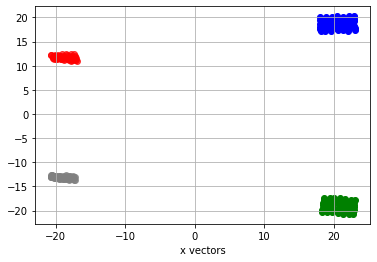

In [9]:
fig = plt.figure()
plt.scatter(point_LE_vecs[:, 0], point_LE_vecs[:, 1], c="blue")
plt.scatter(point_RE_vecs[:, 0], point_RE_vecs[:, 1], c="green")

plt.scatter(point_LM_vecs[:, 0], point_LM_vecs[:, 1], c="red", alpha=0.7)
plt.scatter(point_RM_vecs[:, 0], point_RM_vecs[:, 1], c="gray", alpha=0.7)
plt.grid()
plt.xlabel("y vectors")
plt.xlabel("x vectors")
plt.show()

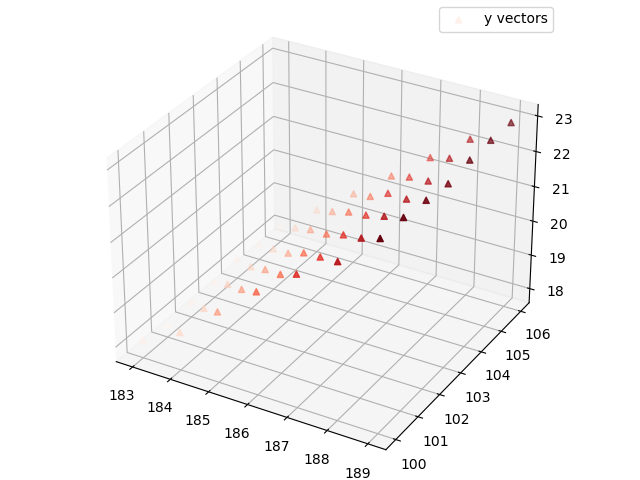

In [8]:

%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 建立 3D 圖形
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax=Axes3D(fig)
x1 = sel_shift_lnmks[:, 1]
y1 = sel_shift_lnmks[:, 0]
z1 = point_LE_vecs[:, 0]
ax.scatter(x1, y1, z1, c=z1, cmap='Reds', marker='^', label='y vectors')
# 顯示圖例
ax.legend()
# 顯示圖形
plt.show()

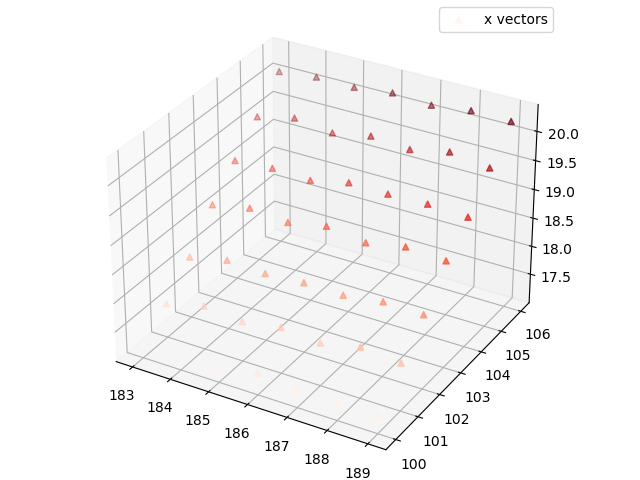

In [9]:
# 建立 3D 圖形
fig = plt.figure()
# ax = fig.gca(projection='3d')
ax=Axes3D(fig)
x1 = sel_shift_lnmks[:, 1]
y1 = sel_shift_lnmks[:, 0]
z1 = point_LE_vecs[:, 1]
ax.scatter(x1, y1, z1, c=z1, cmap='Reds', marker='^', label='x vectors')
# 顯示圖例
ax.legend()
# 顯示圖形
plt.show()